## NetFlix Exploratory Data Analysis 

### Levis Kithinji

#### Data from :*https://www.kaggle.com/shivamb/netflix-shows*

## Lets import useful libraries and packages and the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px


In [2]:
df=pd.read_csv('netflix_titles.csv')
df['date_added']=pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")
df['date_added'].isnull().sum()

10

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## High Level EDA

In [4]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Numerical Column description of release_year
The latest movie released ws in the year 2021 and the oldest is 1925.

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


## Date Analysis

<AxesSubplot:>

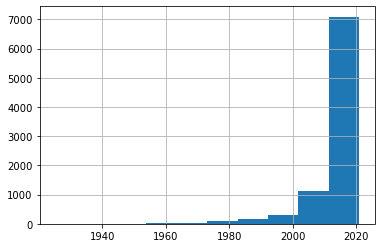

In [7]:
df.release_year.hist() # Matplotlib version


In [8]:
px.histogram(df, x='release_year') #Plotly Method

<AxesSubplot:>

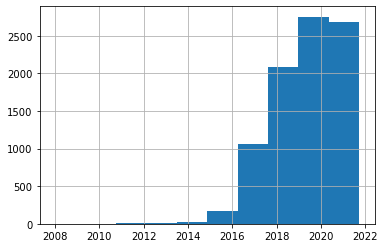

In [9]:
df.date_added.hist()

In [10]:
px.histogram(df, x='date_added') #Plotly method

In [11]:
df[df.release_year==1925]['description']

4250    This collection restores films from women who ...
Name: description, dtype: object

In [12]:
# Extract the month from `date_added`
# Extract the day of the month
df['date_added_month']=df['date_added'].dt.month.fillna(0)
df['date_added_day']=df['date_added'].dt.day.fillna(0)

In [13]:
px.histogram(df, x='date_added' ,color='date_added_month') # Histogram of date

In [14]:
px.histogram(df, x='date_added_month', color='type')

In [15]:
px.histogram(df, x='date_added_day', color='type')

They have most additions on the first day of the month. And the following date that comes in 2nd is the 15th day.

### String Column Analysis

In [16]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day'],
      dtype='object')

In [17]:
px.histogram(df.type)

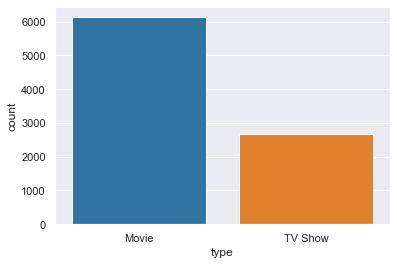

In [18]:
sns.set(style='darkgrid')

ax=sns.countplot(x='type', data=df, palette='tab10')

The above cell shows that for every five movies released, there 2 tv shows released.

In [19]:
# Lets look at countries producing movies and the variations

df['country'].str.split(',', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,United States,None,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None,None
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,United States,None,None,None,None,None,None,None,None,None,None,None
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,United States,None,None,None,None,None,None,None,None,None,None,None
8805,United States,None,None,None,None,None,None,None,None,None,None,None


In [20]:
country_count=df.copy()
country_count=pd.concat([country_count, df['country'].str.split(',' ,expand=True)], axis=1)

pd.set_option('display.max_columns', None)
country_count

country_count=country_count.melt(id_vars=['type','title'], value_vars=range(12), value_name='country')
country_count=country_count[country_count['country'].notna()]

country_count.reset_index(inplace=True)
del country_count['index']
country_count['country']=country_count['country'].str.strip(' ')




/tmp/ipykernel_72821/668601194.py:7: FutureWarning:

This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.



In [21]:
px.histogram(country_count, 'country', color='type').update_xaxes(categoryorder='total descending')

In [22]:
df['rating'].unique()

px.histogram(df, 'rating').update_xaxes(categoryorder='total descending')

In [23]:
df['cast_count']=df['cast'].str.split(',')
df=df[df['cast_count'].notna()]
df.cast_count=df.cast_count.apply(lambda x: len(x))
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,24.0,16
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,3.0,9.0,6
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11.0,20.0,10
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11.0,1.0,7
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1.0,11.0,9


In [24]:
px.histogram(df, 'cast_count').update_xaxes(categoryorder='total descending')

## Say a producer wants to fins the best time to release content(Tv Shows), when should he do so? When there is least amount of content being added.Now thats right!

**First we isolate Tv shows from movies since we will we working with this data**

In [25]:
df_shows=df[df["type"]=="TV Show"]
df_shows.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9.0,24.0,19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9.0,24.0,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9.0,24.0,8
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,9.0,24.0,16
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9.0,24.0,4


**Drop all missing vlaues then create a sub set of the df_shows with ""date_added" Extract year and month data**

In [26]:
netflix_date=df_shows[['date_added']].dropna(0)

netflix_date['year']=netflix_date['date_added'].dt.year

netflix_date['month']=netflix_date['date_added'].dt.month_name()
netflix_date[['year']].astype(int)

netflix_date

/tmp/ipykernel_72821/4158013411.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



,date_added,year,month
1,2021-09-24,2021,September
2,2021-09-24,2021,September
4,2021-09-24,2021,September
5,2021-09-24,2021,September
8,2021-09-24,2021,September
...,...,...,...
8785,2018-06-07,2018,June
8795,2018-05-01,2018,May
8796,2017-01-17,2017,January
8797,2018-09-13,2018,September


In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

Formulate a table of values of release years based on the month they were released in.

In [28]:
df_dates=netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df_dates


year,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,
December,0.0,1.0,6.0,42.0,37.0,53.0,43.0,56.0,0.0
November,0.0,2.0,2.0,16.0,28.0,33.0,62.0,42.0,0.0
October,2.0,0.0,4.0,18.0,25.0,38.0,58.0,44.0,0.0
September,1.0,0.0,1.0,17.0,28.0,31.0,33.0,44.0,52.0
August,1.0,0.0,0.0,7.0,34.0,27.0,41.0,37.0,51.0
July,0.0,0.0,2.0,8.0,33.0,22.0,52.0,33.0,71.0
June,0.0,0.0,2.0,6.0,27.0,24.0,38.0,35.0,75.0
May,0.0,0.0,1.0,4.0,22.0,24.0,43.0,47.0,29.0
April,0.0,1.0,4.0,8.0,26.0,26.0,37.0,42.0,40.0


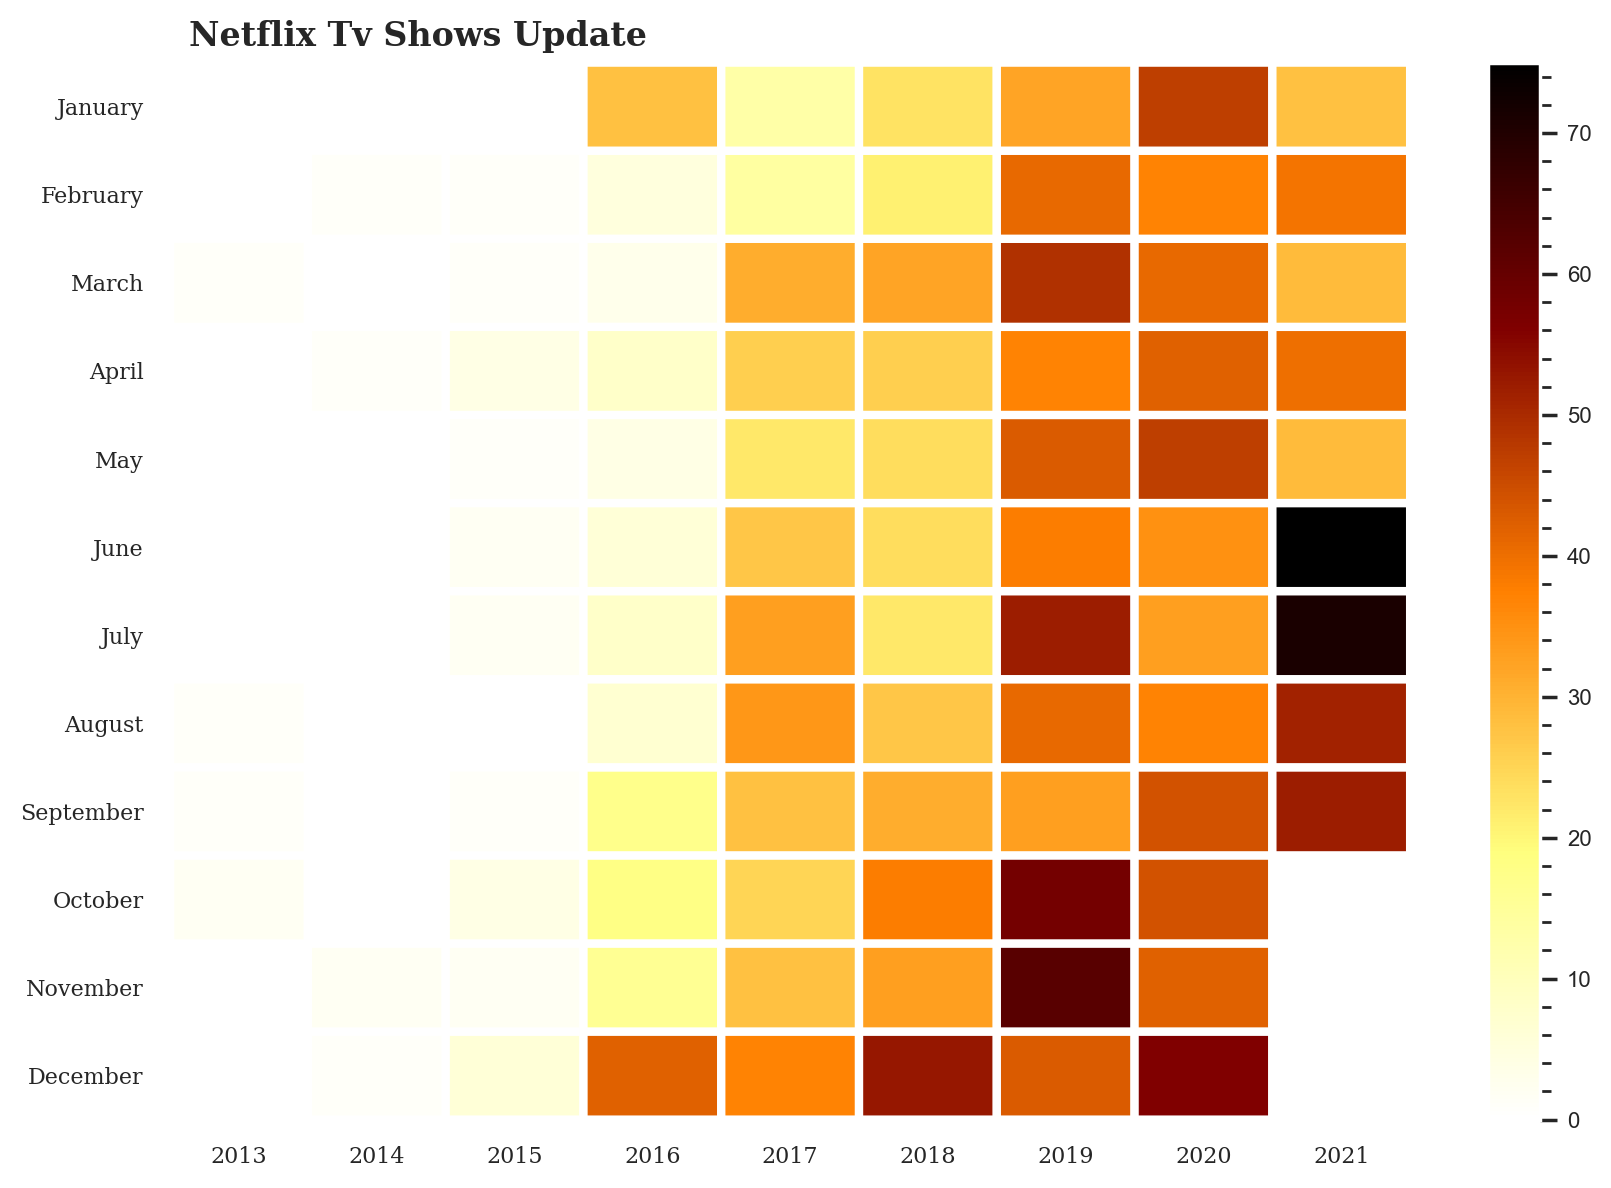

In [29]:
# data viz
plt.figure(figsize=(10,7 ), dpi=200)
plt.pcolor(df_dates, cmap="afmhot_r", edgecolors="white", linewidth=3)

#heatmap
plt.xticks(np.arange(0.5, len(df_dates.columns),1), df_dates.columns, fontsize=8, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df_dates.index),1), df_dates.index, fontsize=8, fontfamily='serif')


plt.title("Netflix Tv Shows Update", fontsize=12, fontfamily='serif', fontweight='heavy',position=(0.20, 1.0+0.02))

cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()



From the heatmap above taking 20/2021 as the lastest years, January to March was the best time to upload as there is relatively low updates of tv shows. and there is an imminent mass update in the summer as from May to September.

## Movie Ratings Analysis


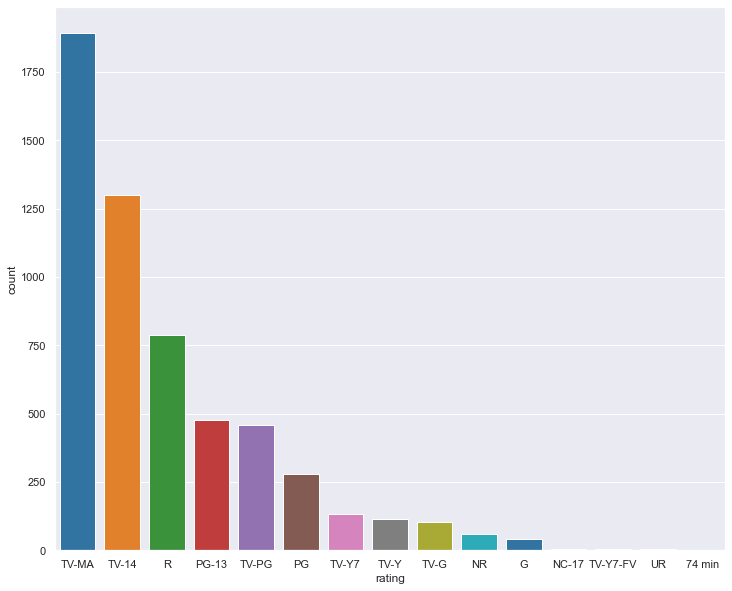

In [30]:
df_movies=df[df['type']=='Movie']
plt.figure(figsize=(12,10))

sns.set_style('darkgrid')

ax=sns.countplot(x='rating', data=df_movies, palette="tab10", order=df_movies['rating'].value_counts().index[0:15])


The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

## Analysis of IMDb ratings with regard to Top Rated Movies on Netflix

In [31]:
df_imdbratings=pd.read_csv("IMDb ratings.csv", usecols=['weighted_average_vote'])
df_imdbtitles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])



df_ratings=pd.DataFrame({'Title':df_imdbtitles.title,'release_year':df_imdbtitles.year,'Rating':df_imdbratings.weighted_average_vote,
'genre':df_imdbtitles.genre})
df_ratings.head()

# Lets drop repeated entries

df_ratings.drop_duplicates(subset=['Title','release_year','Rating'], inplace=True)
df_ratings.shape

/home/leviscoffie/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



(85852, 4)

For comparative purposes we are going to perform an inner join on the ratings and netflix datasets to get the content that has bpth ratings on IMDB and are still available on Netflix

In [32]:
df.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
date_added_month           float64
date_added_day             float64
cast_count                   int64
dtype: object

In [33]:
df_ratings.dropna()

joint_data=df_ratings.merge(df, left_on='Title', right_on='title', how='inner')

joint_data=joint_data.sort_values(by='Rating', ascending=False)

joint_data.head()



,Title,release_year_x,Rating,genre,show_id,type,title,director,cast,country,date_added,release_year_y,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
1077,Breakout,2019,9.0,"Adventure, Comedy, Drama",s5394,TV Show,Breakout,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,2017-07-01,2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...,7.0,1.0,6
1066,Innocent,2017,9.0,Comedy,s4175,TV Show,Innocent,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,2019-01-23,2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ...",1.0,23.0,13
423,Pulp Fiction,1994,8.9,"Crime, Drama",s7803,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,2019-01-01,1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,1.0,1.0,12
404,Schindler's List,1993,8.9,"Biography, Drama, History",s7958,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,2018-04-01,1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,4.0,1.0,12
1397,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s341,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",A troubled thief who extracts secrets from peo...,8.0,1.0,12


Now we visualize the top 10 rated movies on Netflix

In [34]:
# def rtgs_suncharts():
#     import plotly.graph_objs as go
#     fig=go.Figure()
#     top_rated=joint_data[:10]
#     top_rated=top_rated.to_dict()
#     fig.add_trace(go.Sunburst(top_rated, parent='title',
#     lables='country',
#     values='Rating',
#     color='Rating',
#     domain=dict(column=0)
#     ))

#     bottom_rated=joint_data[10:]
#     bottom_rated=bottom_rated.to_dict()
    
#     fig.add_trace(go.Sunburst(bottom_rated,
#     parent='title', 
#     lables='country',
#     values='Rating',
#     color='Rating',
#     domain=dict(column=1),
#     maxdepth=2
#     ))

#     layout=go.Layout(height=600,
#                     width=600,
#                     autosize=False,
#                     grid=dict(columns=2, rows=1),
#                     title="Side by SIde Sunburst for Top and Bottom Rated content")


    
#     fig.show() #plolty

In [35]:
top_rated=joint_data[:10]


fig1=px.sunburst(top_rated,path=['title','country'],
values='Rating',
color='Rating')
fig1.show()


We see the the movie with the highest rating is from Turkey, called *Innocent*.

Lets find out the countries with the most content from the joined data

In [36]:
joint_countrycount=country_count['country'].value_counts().sort_values(ascending=False)
joint_countrycount=pd.DataFrame(joint_countrycount)

top_countries=joint_countrycount[:11]
top_countries.reset_index(inplace=True)
top_countries=top_countries.rename(columns=({'index':"countries",'country':"count"}))

val=list(top_countries['count'].values)

The USA has the most entries in shows and movies and China closes the top ten.

Now are funnel graph to show how they vary

In [37]:
import plotly.express as px
data=dict(countries=['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico',
 'China'],
 count=[3690, 1046, 806, 445, 393, 318, 232, 231, 226, 169, 162])

fig=px.funnel(data, x='count', y='countries')

fig.show(  
)


### Year Wise Analysis
#### (Movies)

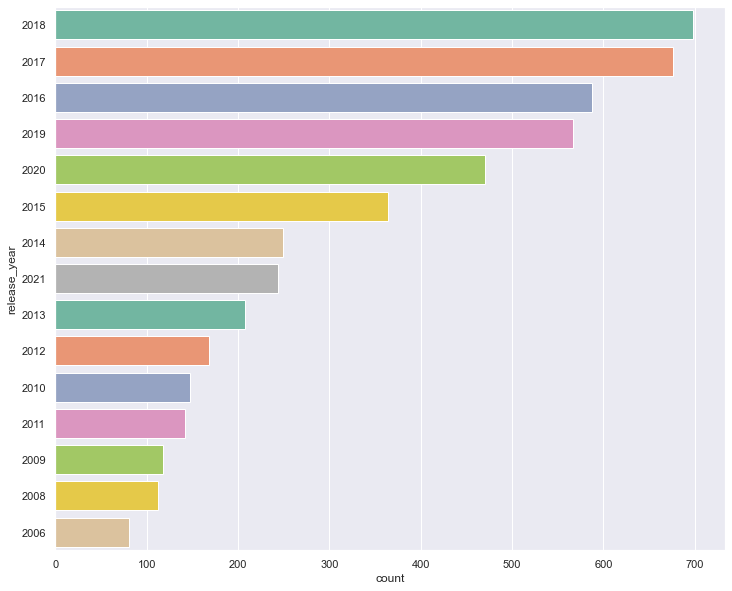

In [38]:
df_movies=df[df["type"]=="Movie"]
plt.figure(figsize=(12,10))

sns.set_style('darkgrid')

ax=sns.countplot(y="release_year", data=df_movies, palette="Set2", order=df_movies.release_year.value_counts().index[0:15])

We can see that 2018 is the year that most movies were released.

In [39]:
countries={}

df_movies['country']=df_movies['country'].fillna('Unknown')
cou=list(df_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(',')) # dividing for into different lists for different movies

    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1 # add value no by 1

        else:
            countries[i[0]]=1 # populate value-pair with 1

    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1

            else:
                countries[j]=1

/tmp/ipykernel_72821/1766934777.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
countries_clean={}

for country, no in countries.items():
    country=country.replace(" ","")

    if country in list(countries_clean.keys()):
        countries_clean[country]+=no

    else:
        countries_clean[country]=no


countries_clean={k:v for k, v in sorted(countries_clean.items(), key=lambda item:item[1], reverse=True)}


countries_clean



{'UnitedStates': 351,
 'France': 148,
 'UnitedKingdom': 138,
 'Canada': 130,
 'Germany': 100,
 'Belgium': 73,
 'China': 52,
 'Spain': 41,
 'Japan': 35,
 'Australia': 32,
 'India': 31,
 'HongKong': 25,
 'Italy': 22,
 'SouthAfrica': 20,
 'Mexico': 20,
 'Sweden': 20,
 'UnitedArabEmirates': 19,
 'Netherlands': 18,
 'Switzerland': 16,
 'CzechRepublic': 15,
 'Argentina': 15,
 'SouthKorea': 14,
 'Denmark': 13,
 'Singapore': 12,
 'Poland': 11,
 'Ireland': 11,
 'Brazil': 10,
 'Norway': 10,
 'Luxembourg': 10,
 'NewZealand': 9,
 'Bulgaria': 9,
 'Qatar': 9,
 'Nigeria': 8,
 'Greece': 8,
 'Lebanon': 8,
 'Russia': 8,
 'Egypt': 7,
 'Chile': 7,
 'Serbia': 7,
 'Israel': 6,
 'Hungary': 6,
 'Austria': 6,
 'Taiwan': 6,
 'Cambodia': 6,
 'Portugal': 6,
 'Iceland': 6,
 'Jordan': 6,
 'Romania': 5,
 'Colombia': 5,
 'Thailand': 5,
 'Uruguay': 5,
 'Peru': 5,
 'Morocco': 5,
 '': 4,
 'Kenya': 4,
 'Finland': 4,
 'Iran': 4,
 'Ghana': 3,
 'Algeria': 3,
 'SaudiArabia': 3,
 'Indonesia': 3,
 'Malaysia': 3,
 'Philippines'

# The Top 10 Movie Creating Countries

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'France'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Belgium'),
 Text(6, 0, 'China'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Australia')]

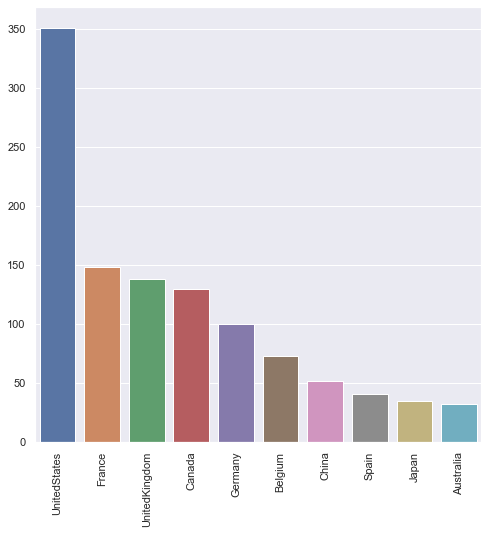

In [41]:
plt.figure(figsize=(8,8))

ax=sns.barplot(x=list(countries_clean.keys())[0:10], y=list(countries_clean.values())[0:10])

ax.set_xticklabels(list(countries_clean.keys())[:10], rotation=90)

The top 3 movie creating countries are United States, France and United Kingdom.

In [42]:
df_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date_added_month', 'date_added_day', 'cast_count'],
      dtype='object')

## Lets Analyse The Movie Durations.

In [43]:

df_movies['duration']=df_movies['duration'].astype(str)
df_movies['duration']=df_movies['duration'].str.replace(' min', '')

df_movies['duration']=pd.to_numeric(df_movies['duration'], errors='coerce').convert_dtypes()




df_movies.head()




/tmp/ipykernel_72821/4261374905.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_72821/4261374905.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_72821/4261374905.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9.0,24.0,10
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9.0,24.0,8
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,9.0,24.0,11
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",After most of her family is murdered in a terr...,9.0,23.0,11
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",Unknown,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,9.0,22.0,10


In [44]:
df_movies.dtypes

show_id                     object
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                     Int64
listed_in                   object
description                 object
date_added_month           float64
date_added_day             float64
cast_count                   int64
dtype: object

<AxesSubplot:xlabel='duration', ylabel='Density'>

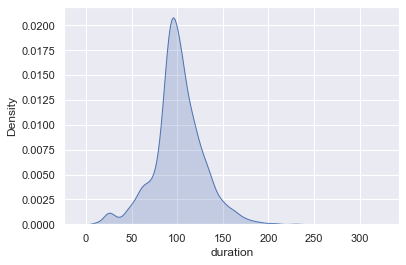

In [45]:
sns.set_style('darkgrid')
sns.kdeplot(data=df_movies['duration'], shade=True)

There are many movieson Netflix that range in the duration of 80-120 minutes. That's averagely the time a movies is..more than three hours is a baggage.

## Lets Analyse the Genres
using WordCloud

In [46]:
from collections import Counter

genres=list(df_movies['listed_in'])

gen=[]

for i in genres:
    i=i.split(',')
    # print(i)
    for j in i:
        gen.append(j.replace(" ",''))
        
g=Counter(gen)



# Lets check the Genres viz a viz their counts on Netflix

/tmp/ipykernel_72821/561314620.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Genres')

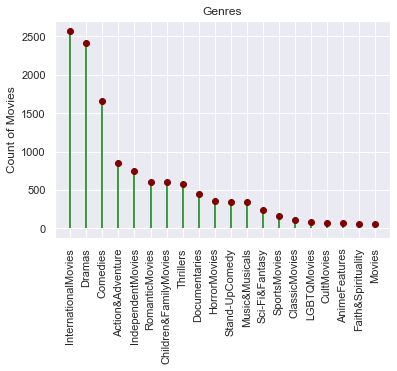

<Figure size 720x720 with 0 Axes>

In [47]:
g={k:v for k, v in sorted(g.items(), key=lambda item:item[1], reverse=True)}

fig, ax=plt.subplots()

fig=plt.figure(figsize=(10,10))
x=list(g.keys())
y=list(g.values())

ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y,'o',color='maroon')

ax.set_xticklabels(x, rotation=90)
ax.set_ylabel('Count of Movies')

#set a title
ax.set_title('Genres')

International Movies is the most sought after movie genre in Netflix. Faith & Spirituality is the least.

### Analysis of TV_Series on Netflix

In [55]:
countries1={}
df_shows['country']=df_shows['country'].fillna('Unknown')

cou1=list(df_shows['country'])
# print(cou1)
for i in cou1:
    
    i=list(i.split(','))
    # print(i)

    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1

        else:
            countries1[i[-1]]=1 
            
            '''i[0] refers to the first element and only element of the i element list'''

    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1

            else:
                countries1[j]=1

countries1

/tmp/ipykernel_72821/2788897600.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'South Africa': 1,
 'Unknown': 1,
 'India': 1,
 'United Kingdom': 1,
 'United States': 2,
 'Mexico': 1,
 'Turkey': 1,
 'Australia': 1,
 'Finland': 3,
 'Nigeria': 1,
 'Japan': 2,
 'Belgium': 1,
 ' United Kingdom': 25,
 'France': 1,
 ' United States': 85,
 'South Korea': 1,
 'Spain': 1,
 ' Singapore': 5,
 'Russia': 1,
 '': 1,
 ' South Korea': 6,
 'Ireland': 3,
 'Italy': 2,
 'Argentina': 1,
 'Jordan': 1,
 'Colombia': 3,
 'Israel': 1,
 'Taiwan': 1,
 'Germany': 2,
 ' Canada': 41,
 'Canada': 1,
 ' Japan': 24,
 'Poland': 2,
 ' Belgium': 3,
 'Thailand': 1,
 ' New Zealand': 6,
 ' Germany': 16,
 ' Netherlands': 3,
 'Sweden': 1,
 'China': 1,
 'Iceland': 1,
 'Denmark': 1,
 'Philippines': 1,
 ' Indonesia': 2,
 'United Arab Emirates': 1,
 'Norway': 1,
 ' Denmark': 2,
 'Lebanon': 1,
 ' France': 25,
 'Egypt': 1,
 ' Australia': 10,
 ' Colombia': 7,
 'Luxembourg': 1,
 'Brazil': 1,
 'Senegal': 1,
 ' Finland': 1,
 ' Ireland': 8,
 'Saudi Arabia': 2,
 'Kuwait': 1,
 'Indonesia': 1,
 ' Italy': 5,
 ' India': 

In [56]:
countries_clean1={}

for country, no in countries1.items():
    country=country.replace(' ','')

    if country in list(countries_clean1.keys()):
        countries_clean1[country]+=no

    else:
        countries_clean1[country]=no


countries_clean1={k:v for k,v in sorted(countries_clean1.items(), key=lambda item:item[1], reverse=True)}

countries_clean1


{'UnitedStates': 87,
 'Canada': 42,
 'UnitedKingdom': 26,
 'Japan': 26,
 'France': 26,
 'Germany': 18,
 'Australia': 11,
 'Ireland': 11,
 'Mexico': 10,
 'Colombia': 10,
 'Spain': 9,
 'China': 8,
 'SouthKorea': 7,
 'Italy': 7,
 'SouthAfrica': 6,
 'Singapore': 6,
 'NewZealand': 6,
 'Finland': 4,
 'Belgium': 4,
 'Netherlands': 4,
 'Sweden': 4,
 'Poland': 3,
 'Denmark': 3,
 'Indonesia': 3,
 'Brazil': 3,
 'HongKong': 3,
 'India': 2,
 'Israel': 2,
 'Lebanon': 2,
 'Egypt': 2,
 'Luxembourg': 2,
 'SaudiArabia': 2,
 'Kuwait': 2,
 'CzechRepublic': 2,
 'Chile': 2,
 'Malaysia': 2,
 'WestGermany': 2,
 'Greece': 2,
 'Unknown': 1,
 'Turkey': 1,
 'Nigeria': 1,
 'Russia': 1,
 '': 1,
 'Argentina': 1,
 'Jordan': 1,
 'Taiwan': 1,
 'Thailand': 1,
 'Iceland': 1,
 'Philippines': 1,
 'UnitedArabEmirates': 1,
 'Norway': 1,
 'Senegal': 1,
 'Belarus': 1,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Mauritius': 1,
 'Croatia': 1,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'Pakistan': 1,
 'Azerbaijan'

# Most TV sHOW producing countries are as shown in the barplot below

Text(0, 0.5, 'Countries Count')

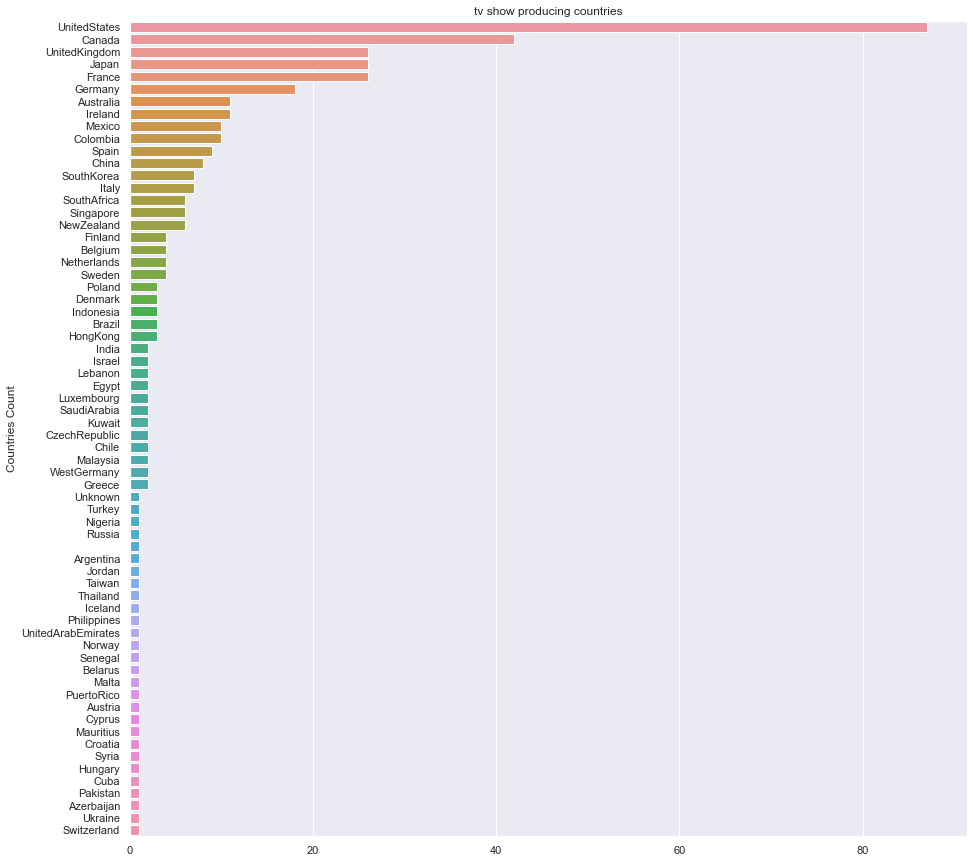

In [67]:
plt.figure(figsize=(15,15))

plt.title('tv show producing countries')

sns.barplot(x=list(countries_clean1.values()),y=list(countries_clean1.keys()))

plt.ylabel('Countries Count')

Again, United States has the most content up on Netflix in the tv show category

# Lets Determine the Shows with Longest Duration(Most Seasons)

In [76]:
features=['title', 'duration']
"""Nice trick to create a dataframe..Pretty Clever"""
durations=df_shows[features]

durations['number_of_seasons']=durations['duration'].str.replace(' Season','')
durations['number_of_seasons']=durations['number_of_seasons'].str.replace('s','')
durations['number_of_seasons']=durations['number_of_seasons'].astype(str).astype(int)

/tmp/ipykernel_72821/2261988575.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_72821/2261988575.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_72821/2261988575.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='title'>

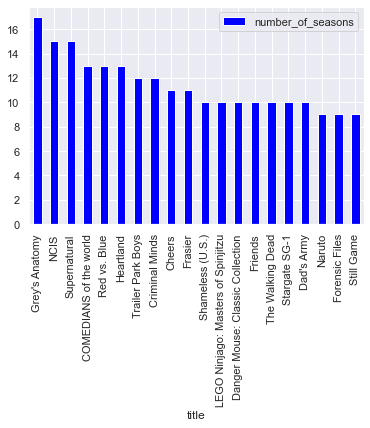

In [80]:
t=['title', 'number_of_seasons']
top=durations[t]

top=top.sort_values(by='number_of_seasons', ascending=False)

#lets plot for the top 20
top20=top[0:20]
top20.plot(kind='bar',x='title', y="number_of_seasons", color='blue')

Grey's Anatomy ,NCIS, and Supernatural are the series with most seasons on Netflix

### For the lowest Number of Seasons

In [88]:
bottom=top.sort_values(by='number_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig=go.Figure(data=[go.Table(header=dict(values=['Title','No of Seasons']), 

cells=dict(values=[bottom['title'],bottom['number_of_seasons']], 
fill_color='lavender'))

])
fig.show()

Short stint series are the ones mentioned above

# Word Cloud for Genres

A  word cloud is an image made of words that together resembe a cloudy shape

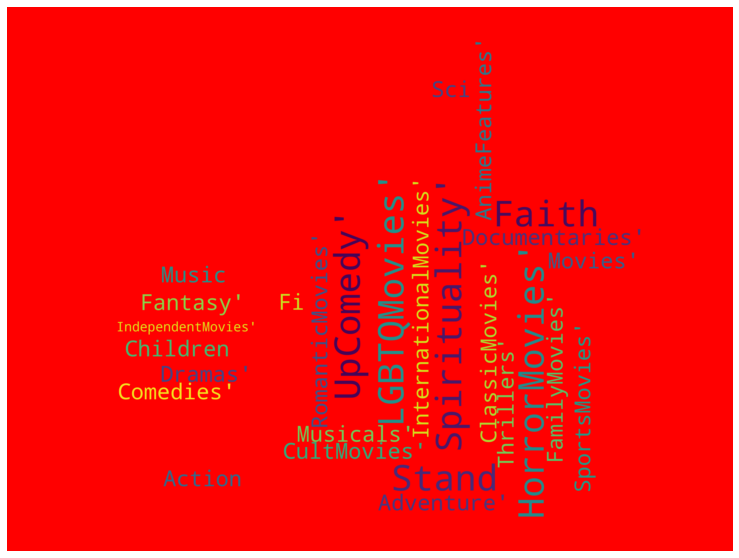

In [95]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from PIL import Image

text=list(set(gen))

mask=np.array(Image.open("upvote.png"))

wordcloud=WordCloud(max_words=1000000, background_color='red', mask=mask).generate(str(text))

plt.rcParams['figure.figsize']=(13,13)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()


## USA TV Show Analysis

We can concentrate on USA since its proven to be dominant overly.

In [99]:
us_shows=df_shows[df_shows['country']=='United States']
us_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,9.0,22.0,8
40,s41,TV Show,He-Man and the Masters of the Universe,NaN,"Yuri Lowenthal, Kimberly Brooks, Antony Del Ri...",United States,2021-09-16,2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy",Mighty teen Adam and his heroic squad of misfi...,9.0,16.0,11
55,s56,TV Show,Nailed It,NaN,"Nicole Byer, Jacques Torres",United States,2021-09-15,2021,TV-PG,6 Seasons,Reality TV,Home bakers with a terrible track record take ...,9.0,15.0,2
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9.0,15.0,7
82,s83,TV Show,Lucifer,NaN,"Tom Ellis, Lauren German, Kevin Alejandro, D.B...",United States,2021-09-10,2021,TV-14,6 Seasons,"Crime TV Shows, TV Comedies, TV Dramas","Bored with being the Lord of Hell, the devil r...",9.0,10.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8669,s8670,TV Show,V.R. Troopers,NaN,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,2016-01-01,1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...,1.0,1.0,13
8710,s8711,TV Show,Weeds,NaN,"Mary-Louise Parker, Hunter Parrish, Alexander ...",United States,2014-04-01,2012,TV-MA,8 Seasons,"TV Comedies, TV Dramas",A suburban mother starts selling marijuana to ...,4.0,1.0,10
8726,s8727,TV Show,When Calls the Heart,NaN,"Erin Krakow, Daniel Lissing, Lori Loughlin, Ma...",United States,2018-12-29,2017,TV-PG,5 Seasons,TV Dramas,"Leaving behind her upper-crust city roots, a w...",12.0,29.0,14
8747,s8748,TV Show,Winsanity,NaN,Donald Faison,United States,2018-12-15,2016,TV-G,1 Season,Reality TV,Actor Donald Faison hosts this game show in wh...,12.0,15.0,1


In [104]:
# to find the oldest us shows
oldest_shows=us_shows.sort_values(by='release_year')[0:20]
oldest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,cast_count
8541,s8542,TV Show,The Twilight Zone (Original Series),NaN,Rod Serling,United States,2017-07-01,1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea...",7.0,1.0,1
8189,s8190,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,2017-07-01,1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...,7.0,1.0,6
6970,s6971,TV Show,Highway to Heaven,NaN,"Michael Landon, Victor French",United States,2016-11-01,1988,TV-PG,5 Seasons,TV Dramas,"Under God's direction, angel Jonathan and ex-c...",11.0,1.0,2
7721,s7722,TV Show,Pee-wee's Playhouse,NaN,Paul Reubens,United States,2014-12-18,1990,TV-PG,5 Seasons,"Classic & Cult TV, Kids' TV, TV Comedies",Pee-wee Herman brings his stage show to the ma...,12.0,18.0,1
8644,s8645,TV Show,Twin Peaks,NaN,"Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",United States,2017-07-01,1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas","""Who killed Laura Palmer?"" is the question on ...",7.0,1.0,26
7175,s7176,TV Show,Ken Burns: The Civil War,Ken Burns,"Sam Waterston, Julie Harris, Jason Robards, Mo...",United States,2017-02-22,1990,TV-14,1 Season,Docuseries,Ken Burns's documentary depicts the action of ...,2.0,22.0,17
160,s161,TV Show,Major Dad,NaN,"Gerald McRaney, Shanna Reed, Nicole Dubuc, Che...",United States,2021-09-01,1992,TV-PG,4 Seasons,TV Comedies,When he marries a journalist and becomes stepd...,9.0,1.0,8
6456,s6457,TV Show,Cheers,NaN,"Ted Danson, Rhea Perlman, George Wendt, John R...",United States,2017-07-01,1992,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies","Sam Malone, an ex-baseball player turned bar o...",7.0,1.0,9
4946,s4947,TV Show,Star Trek: The Next Generation,NaN,"Patrick Stewart, Jonathan Frakes, LeVar Burton...",United States,2018-04-02,1993,TV-PG,7 Seasons,"TV Action & Adventure, TV Sci-Fi & Fantasy",Decades after the adventures of the original E...,4.0,2.0,9
67,s68,TV Show,Saved by the Bell,NaN,"Mark-Paul Gosselaar, Tiffani Thiessen, Mario L...",United States,2021-09-15,1994,TV-PG,9 Seasons,"Kids' TV, TV Comedies","From middle school to college, best friends Za...",9.0,15.0,7


Oldest Series in USA was released in the year 1963

In [107]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title','Release_Year'],fill_color='paleturquoise'),
                cells=dict(values=[oldest_shows['title'],oldest_shows['release_year']],fill_color='pink')
)
])

fig.show()

The table above shows the oldest_shows on Netflix

The newest shows are shown below(latest US televison Shows)

In [119]:
newest_usshows=us_shows.sort_values(by='release_year', ascending=False)[0:50]

In [120]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title','Release Year'], fill_color='yellow'),
                    cells=dict(values=[newest_usshows['title'],newest_usshows['release_year']], fill_color='lavender'))])

fig.show()

# Analyse Content from France

In [124]:
fr_content=df[df['country']=='France']

# fr_content.info()

fr_conten=fr_content.dropna()

fig=px.treemap(fr_conten, path=['country','director'],
color='director', hover_data=['director','title'], color_continuous_scale='Purples')

fig.show()


The director with the most produced content in France is called "Thierry Donald" with 5, the 2nd one is 'Florent Bodin' with 2... all the other ones have one which shows that France gives opportunities to many directors.

In [139]:
newest_frshows=fr_content.sort_values(by='release_year', ascending=False)[0:20]

In [140]:
fig=go.Figure(data=[go.Table(header=dict(values=['Title','Release Year'], fill_color='yellow'),
                    cells=dict(values=[newest_frshows['title'],newest_frshows['release_year']], fill_color='lavender'))])

fig.show()

# Most Sought After Movie and Show Durarions

In [143]:
topdirs=pd.value_counts(df['duration'])

fig=go.Figure([go.Bar(x=topdirs.index, y=topdirs.values, text=topdirs.values, marker_color='indianred')])

fig.update_traces(texttemplate="%{text:.2s}", textposition='outside')

fig.show()

The inference drawn here is that having 1 season is the most preferred duration.